## Линейные модели

In [42]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

%matplotlib inline

plt.style.use(['seaborn', 'seaborn-talk'])

### Генерация данных

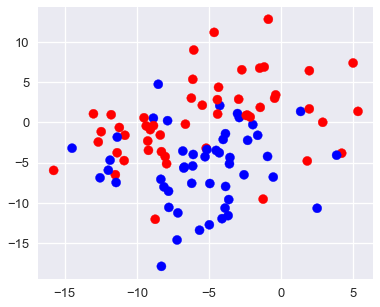

In [43]:
blobs = datasets.make_blobs(centers=4, cluster_std=4, random_state=1)

colors = ListedColormap(['red', 'blue'])
plt.figure(figsize=(6, 5))
plt.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

plt.show()

In [44]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(blobs[0], blobs[1],
                                                                                   test_size=0.3,
                                                                                   random_state=1)

## Линейная классификация

### RidgeClassifier

In [45]:
ridge_classifier = linear_model.RidgeClassifier(random_state=1)

ridge_classifier.fit(train_data, train_label)

ridge_predictions = ridge_classifier.predict(test_data)

print('Предсказание RidgeClassifier:')
print(f'test:\t{test_label}')
print(f'pred:\t{ridge_predictions}')

a = metrics.accuracy_score(test_label, ridge_predictions)
print(f'Верных ответов {a*100:.1f}%')

koef = ridge_classifier.coef_[0]
inter = ridge_classifier.intercept_[0]
print(f'Формула: w_1*{koef[0]:.3f} + w_2*{koef[1]:.3f} + {inter:.2f}')

Предсказание RidgeClassifier:
test:	[1 3 1 1 1 2 2 2 0 2 0 2 0 0 0 0 2 2 3 3 2 3 3 1 0 0 1 2 2 1]
pred:	[1 0 1 2 1 2 2 2 0 3 0 3 0 0 0 0 2 2 3 0 3 1 2 1 0 0 1 0 2 1]
Верных ответов 70.0%
Формула: w_1*0.079 + w_2*0.080 + 0.17


### LogisticRegression

In [46]:
log_regression = linear_model.LogisticRegression(random_state=1)

log_regression.fit(train_data, train_label)
lr_prediction = log_regression.predict(test_data)
lr_proba_predictions = log_regression.predict_proba(test_data)

print('Предсказание LogisticRegression:')
print(f'test:\t{test_label}')
print(f'pred:\t{lr_prediction}')
print(f'prob:\t{np.round(lr_proba_predictions[:,0], 2)}')

a = metrics.accuracy_score(test_label, lr_prediction)
print(f'Верных ответов {a*100:.1f}%')

koef = log_regression.coef_[0]
inter = log_regression.intercept_[0]
print(f'Формула: w_1*{koef[0]:.3f} + w_2*{koef[1]:.3f} + {inter:.2f}')

Предсказание LogisticRegression:
test:	[1 3 1 1 1 2 2 2 0 2 0 2 0 0 0 0 2 2 3 3 2 3 3 1 0 0 1 2 2 1]
pred:	[1 3 1 3 3 3 2 2 0 3 0 3 0 0 0 0 2 2 3 3 3 1 2 1 0 0 1 0 2 2]
prob:	[0.01 0.17 0.   0.   0.09 0.   0.   0.   0.99 0.03 1.   0.01 0.95 0.98
 1.   0.68 0.   0.   0.03 0.19 0.02 0.37 0.   0.   0.81 1.   0.02 0.52
 0.   0.  ]
Верных ответов 66.7%
Формула: w_1*0.523 + w_2*0.557 + 2.93


## Оценка качества по Кросс валидации


In [47]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1],
                                                scoring='accuracy', cv=10)

lr_scoring = model_selection.cross_val_score(log_regression, blobs[0], blobs[1],
                                             scoring='accuracy', cv=10)

print(f'Ridge mean: {ridge_scoring.mean():.2f},',
      f'min-max: {ridge_scoring.min():.2f} ... {ridge_scoring.max():.2f},',
      f'std: {ridge_scoring.std():.5f}')

print(f'Log   mean: {lr_scoring.mean():.2f},',
      f'min-max: {lr_scoring.min():.2f} ... {lr_scoring.max():.2f},',
      f'std: {lr_scoring.std():.5f}')

Ridge mean: 0.63, min-max: 0.50 ... 0.80, std: 0.09000
Log   mean: 0.70, min-max: 0.50 ... 0.90, std: 0.10954


In [48]:
scorer = metrics.make_scorer(metrics.accuracy_score)

cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.3, random_state=2)
cv_strategy.get_n_splits(blobs[1])

20

In [49]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1],
                                                scoring=scorer, cv=cv_strategy)

lr_scoring = model_selection.cross_val_score(log_regression, blobs[0], blobs[1],
                                             scoring=scorer, cv=cv_strategy)

print(f'Ridge mean: {ridge_scoring.mean():.2f},',
      f'min-max: {ridge_scoring.min():.2f} ... {ridge_scoring.max():.2f},',
      f'std: {ridge_scoring.std():.5f}')

print(f'Log   mean: {lr_scoring.mean():.2f},',
      f'min-max: {lr_scoring.min():.2f} ... {lr_scoring.max():.2f},',
      f'std: {lr_scoring.std():.5f}')

Ridge mean: 0.62, min-max: 0.53 ... 0.73, std: 0.05099
Log   mean: 0.64, min-max: 0.57 ... 0.73, std: 0.04203
